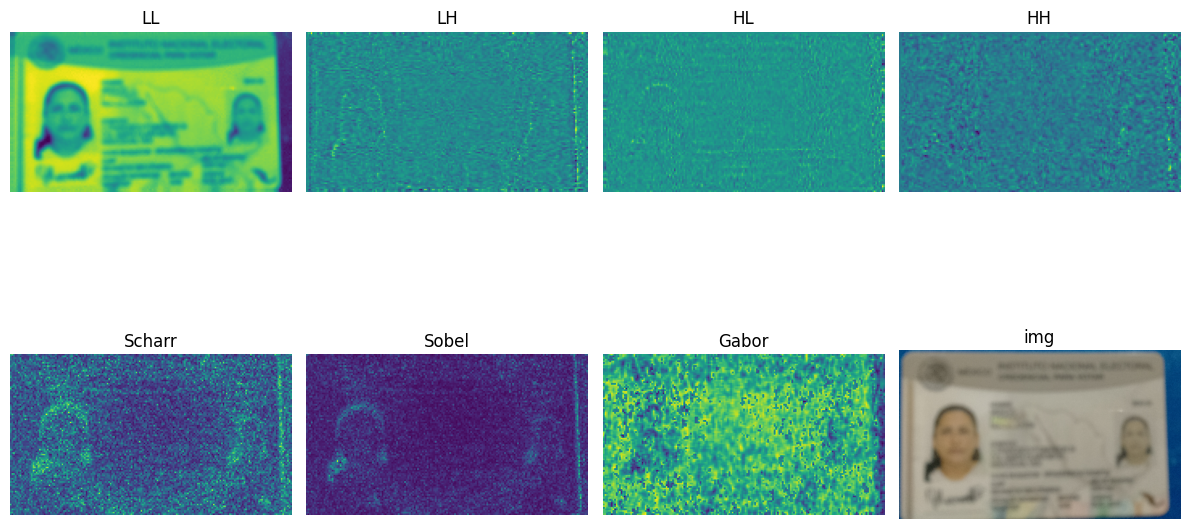

In [8]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import preprocess_img


dataset_path_reales = "/Users/jorgecamero/MoireDataset/batchTrain/Reales"
imgFiles = [file for file in os.listdir(dataset_path_reales) if file.endswith(('.jpg', '.png', '.jpeg'))]
randomImgReales = os.path.join(dataset_path_reales, random.choice(imgFiles))

dataset_path_ataque = "/Users/jorgecamero/MoireDataset/batchTrain/Ataque"
imgFiles = [file for file in os.listdir(dataset_path_ataque) if file.endswith(('.jpg', '.png', '.jpeg'))]
randomImgAtaque = os.path.join(dataset_path_ataque, random.choice(imgFiles))

random_choice = random.choice([randomImgAtaque, randomImgReales])

HEIGHT = 800
WIDTH = 1400

img = cv2.imread(random_choice)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

channels = preprocess_img(img, HEIGHT, WIDTH)

LL = channels['LL_Input']
LH = channels['LH_Input']
HL = channels['HL_Input']
HH = channels['HH_Input']
Scharr = channels['Scharr_Input']
Sobel = channels['Sobel_Input']
Gabor = channels['Gabor_Input']
original = img

channel_list = [LL, LH, HL, HH, Scharr, Sobel, Gabor, img]
titles = ['LL', 'LH', 'HL', 'HH', 'Scharr', 'Sobel', 'Gabor', 'img']

n_channels = len(channel_list)
n_cols = 4
n_rows = (n_channels + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

axs = axs.flat if isinstance(axs, np.ndarray) else [axs]

for i, ax in enumerate(axs):
    if i < n_channels:
        ax.imshow(channel_list[i])
        ax.set_title(titles[i])
        ax.axis('off')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [290]:
import os

path = '/Users/jorgecamero/MOIRE-FRAUD-DETECTION'
print(os.path.exists(path))

for roots, dirs, files in os.walk(path):
    for file in files:
        if not file.endswith(('.jpg', '.png', '.jpeg', '.zip', '.txt', '.json', '.keras')):
            print(os.path.join(roots, file))
            #os.remove(os.path.join(roots, file))

True
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/.DS_Store
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/modelCallbacks.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/predict.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/CNN.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/playground.ipynb
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/.gitignore
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/utils.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/.gitattributes
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/train.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/compare_json.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/read_json.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/CNN.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/train.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/utils.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/read_json.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/predict.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DET

In [3]:
from utils import get_model

model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)


Prediccion: Ataque


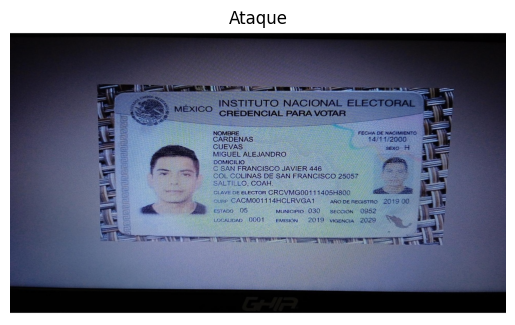

In [263]:
from utils import load_img, preprocess_img
from predict import predict_img

import os
import random
import matplotlib.pyplot as plt

paths = ['/Users/jorgecamero/MoireDataset/batchTrain/Ataque', '/Users/jorgecamero/MoireDataset/batchTrain/Reales']
path = random.choice(paths)
path = paths[0]
img_list = [img for img in os.listdir(path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
img_path = os.path.join(path, random.choice(img_list))

img = load_img(img_path)
img_elements = preprocess_img(img)

predict = test_image(model=model, img=img_elements)
predict_label = 'Real' if predict == 0 else 'Ataque'
print('Prediccion:', predict_label)

plt.imshow(img)
plt.title(os.path.basename(path))
plt.axis('off')
plt.show()

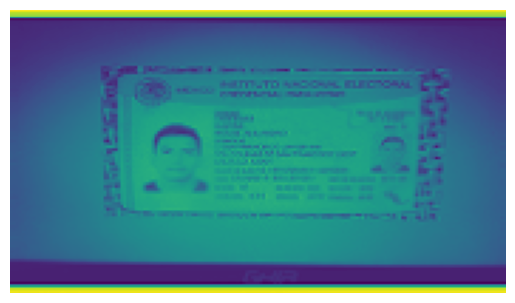

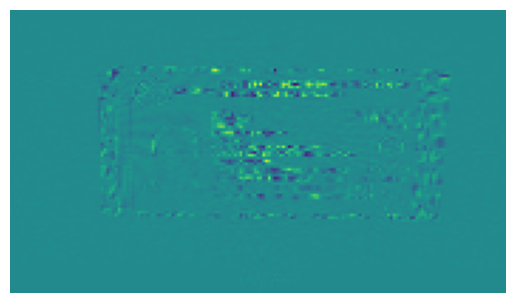

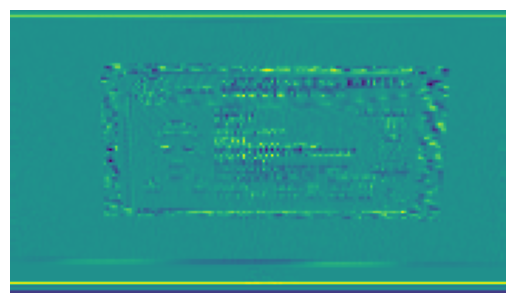

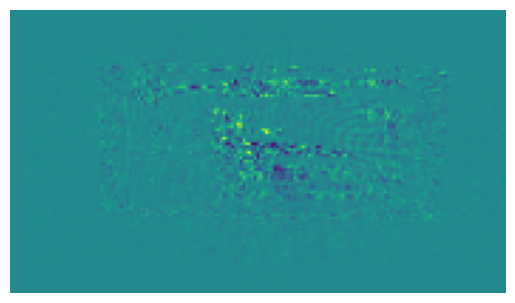

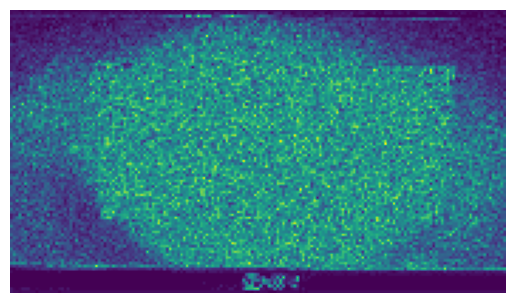

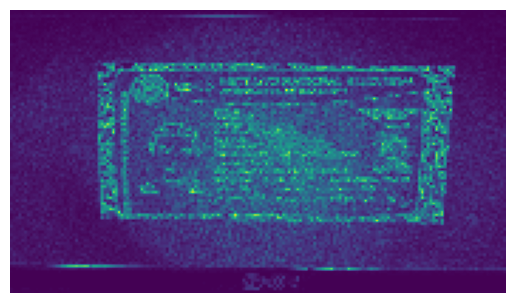

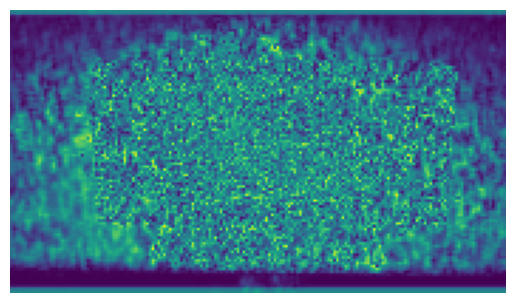

In [264]:
for name, element in img_elements.items():
    plt.imshow(element)
    plt.axis('off')
    plt.show()

In [278]:
import os
from read_json import get_scores

root = '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301'

folder_list = [folder for folder in os.listdir(root) if os.path.isdir(os.path.join(root, folder))]
for folder in folder_list:
    folder_path = os.path.join(root, folder)
    img_list = [img for img in os.listdir(folder_path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
    json_list = [file for file in os.listdir(folder_path) if file.lower().endswith('.json')]
    
    for json, img in zip(json_list, img_list):
        json_path = os.path.join(folder_path, json)
        img_path = os.path.join(folder_path, img)
        print(get_scores(json_path)['result_result'][0])
        print(img)

PASS
2_front_large.jpg
PASS
1_front_large.jpg
PASS
3_front_large.jpg
FAIL
1_front_large.jpg
PASS
8_front_large.jpg
FAIL
1_front_large.jpg
PASS
2_front_large.jpg
PASS
1_front_large.jpg
PASS
3_front_large.jpg
WARNING
1_front_large.jpg
PASS
3_front_large.jpg
FAIL
1_front_large.jpg
PASS
3_front_large.jpg
PASS
1_front_large.jpg
PASS
1_front_large.jpg
PASS
3_front_large.jpg
FAIL
1_front_large.jpg
WARNING
1_front_large.jpg
PASS
1_front_large.jpg
PASS
2_front_large.jpg
WARNING
1_front_large.jpg
WARNING
3_front_large.jpg
FAIL
1_front_large.jpg
WARNING
1_front_large.jpg
PASS
9_front_large.jpg
PASS
2_front_large.jpg
PASS
1_front_large.jpg
PASS
2_front_large.jpg
FAIL
1_front_large.jpg
PASS
5_front_large.jpg
WARNING
1_front_large.jpg
WARNING
7_front_large.jpg
WARNING
1_front_large.jpg
WARNING
2_front_large.jpg
PASS
1_front_large.jpg
PASS
3_front_large.jpg
PASS
1_front_large.jpg
WARNING
2_front_large.jpg
FAIL
1_front_large.jpg
PASS
2_front_large.jpg
PASS
1_front_large.jpg
PASS
2_front_large.jpg
WARN